In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###Loading dataset

### Đây là dữ liệu của 1 chiến dịch tiếp thị trực tiếp (gọi điện thoại) của một ngân hàng

In [2]:
bank = pd.read_csv("/content/bank-additional-full.csv", sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.shape

(41188, 21)

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.duplicated().sum()

12

In [9]:
bank=bank.drop_duplicates(keep='first')
bank=bank.loc[:,~bank.columns.duplicated()]
bank.shape

(41176, 21)

### Tổng số khách hàng tham gia chiến dịch là 41176 người

In [10]:
bank['conversion'] = bank['y']\
.apply(lambda x: 1 if x=='yes' else 0)
print('total conversions: {0} out of {1}'.format(bank.conversion.sum(),bank.shape[0]))
print('conversion rate: {:.2%}'.format((bank.conversion.sum() / bank.shape[0])))

total conversions: 4639 out of 41176
conversion rate: 11.27%


### Số lượng khách hàng đồng ý mở tài khoản là 4639

###Bank_Client
Các thông tin khách hàng

In [11]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


Age

In [12]:
print('Min age: ', bank['age'].max())
print('Max age: ', bank['age'].min())
print('Null Values: ', bank['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


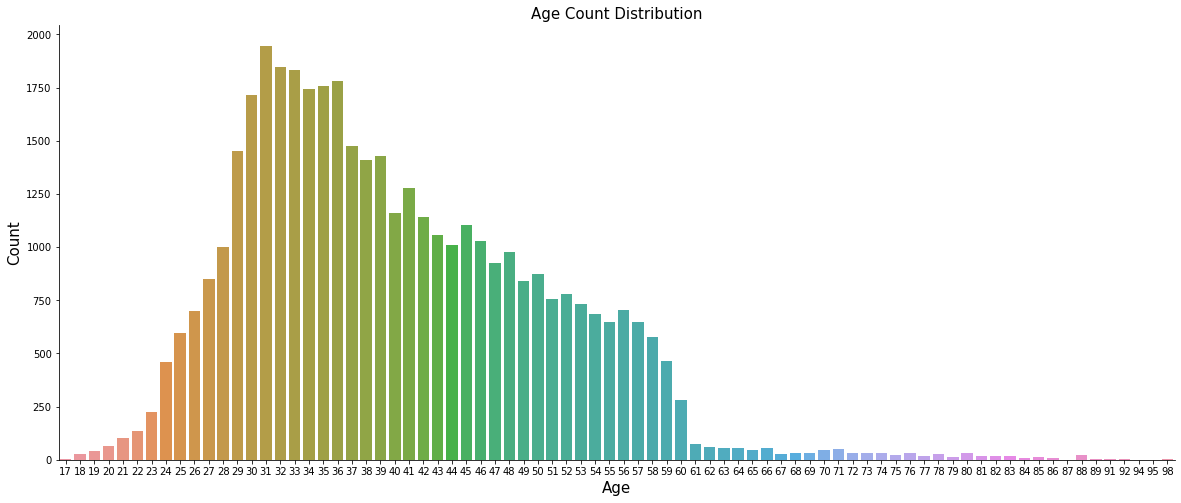

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

### Khách hàng tham gia chiến dịch có độ tuổi từ 17 - 98


In [14]:
bank['age_group'] = pd.cut(bank['age'],[17,23,41,61,99],labels = ['17 - 22', '23 - 40','41 - 60', '60+'])

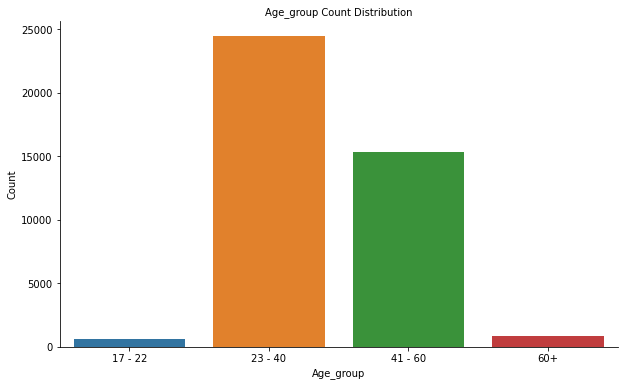

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'age_group', data = bank)
ax.set_xlabel('Age_group', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age_group Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

### Nhóm khách hàng trẻ 23 - 40 là nhóm khách hàng tham gia chiến dịch nhiều nhất, tiếp đến là nhóm khách hàng từ 41 - 60 và nhóm khách hàng cao tuổi 60+ là nhóm có tỉ lệ tham gia chiến dịch thấp nhất

In [16]:
age_conversion = bank.groupby('age_group').agg({'conversion':['sum','count']}).droplevel(0,axis = 1)
age_conversion['conversion_rate'] = age_conversion['sum']/age_conversion['count']*100
age_conversion

,sum,count,conversion_rate
age_group,,,
17 - 22,168,600,28.000000
23 - 40,2664,24433,10.903287
41 - 60,1423,15302,9.299438
60+,382,836,45.693780


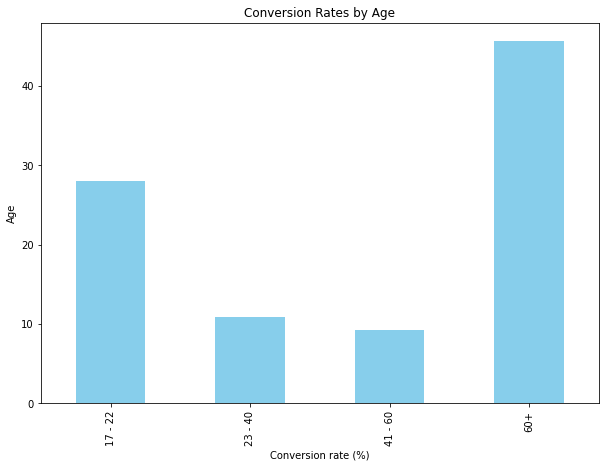

In [17]:
ax = age_conversion['conversion_rate'].plot(kind='bar',color='skyblue',figsize=(10, 7),title='Conversion Rates by Age')
ax.set_xlabel('Conversion rate (%)')
ax.set_ylabel('Age')
plt.show()

### Nhóm khách hàng trong độ tuổi 60+ có tỉ lệ chuyển đổi cao. Có thể khách hàng nhóm này chủ yếu trong độ tuổi nghỉ hưu nên có xu hướng gửi tiết kiệm nhiều hơn. Tiếp đến là nhóm khách hàng nhóm khách hàng từ 17 - 22. Đây là nhóm khách hàng trong độ tuổi đi học

In [18]:
age_job_conversion = bank.groupby(['age_group','job'])['conversion'].sum().unstack()
age_job_conversion

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age_group,,,,,,,,,,,,
17 - 22,13,11,0,0,3,0,3,7,117,11,3,0
23 - 40,917,380,68,26,168,2,97,228,154,518,91,15
41 - 60,404,244,52,53,144,133,49,88,2,191,49,14
60+,17,3,4,27,13,299,0,0,0,10,1,8


### Sau khi visualise ta có thể thấy, nhóm 17 - 22 chủ yếu là học sinh và nhóm 60+ là người đã nghỉ hưu. Với 2 nhóm này có tỉ lệ chuyển đổi cao
-> Action: Nên tập trung giới thiệu vào 2 nhóm khách hàng này (nhóm người trẻ và nhóm người già)

###Categorical variable

In [19]:
for col in bank_client.select_dtypes(include='object').columns:
    print(col)
    print(bank_client[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']


#Job

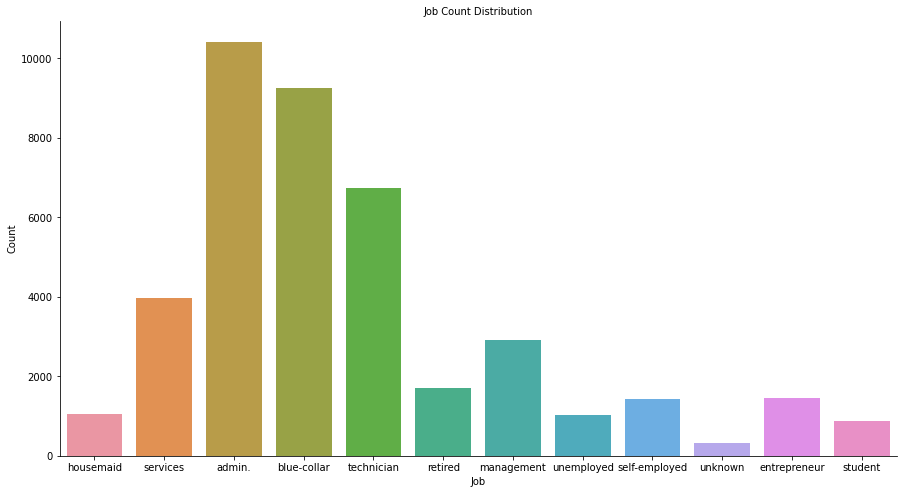

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()


In [21]:
job_ = bank.job.value_counts()/(bank.shape[0])
print(job_)

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64


Phần lớn khách hàng tham gia chiến dịch có nghề nghiệp là quản lý, công nhân và kỹ thuật viên

In [22]:
conversion_rate_by_job = bank.groupby(by='job')['conversion'].sum() / bank.groupby(by='job')['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
unknown          11.212121
Name: conversion, dtype: float64

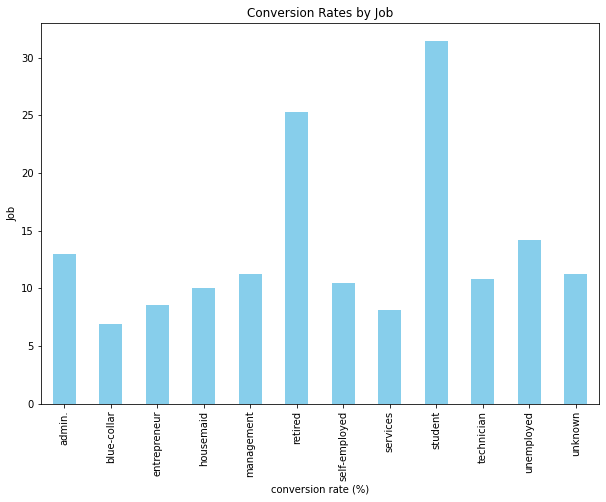

In [23]:
ax = conversion_rate_by_job.plot(kind='bar',color='skyblue',figsize=(10, 7),title='Conversion Rates by Job')
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

### Tỉ lệ chuyển đổi ở 3 nhóm khách hàng Học sinh, Người đã nghỉ hưu, Nhà quản lý là cao nhất trong khi đó họ không phải nhóm khách hàng tham gia chiến dịch lớn nhất. Trong khi đó, nhóm khách hàng công nhân và người làm dịch vụ có tỉ lệ chuyển đổi thấp nhất.
###-> Nghề nghiệp không ảnh hưởng nhiều đến Conversion rate
###-> Action: Tập trung quảng cáo các dịch vụ của ngân hàng đối với các nhóm khách hàng là Học sinh, Người đã nghỉ hưu, Nhà quản lý 

#Marital 

In [24]:
bank_client['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

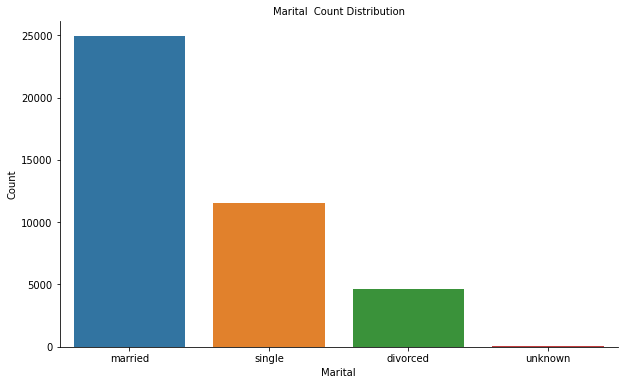

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital  Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

In [26]:
conversion_rate_by_marital = bank.groupby(by='marital')['conversion'].sum() / bank.groupby(by='marital')['conversion'].count() * 100.0
conversion_rate_by_marital

marital
divorced    10.323140
married     10.156093
single      14.008993
unknown     15.000000
Name: conversion, dtype: float64

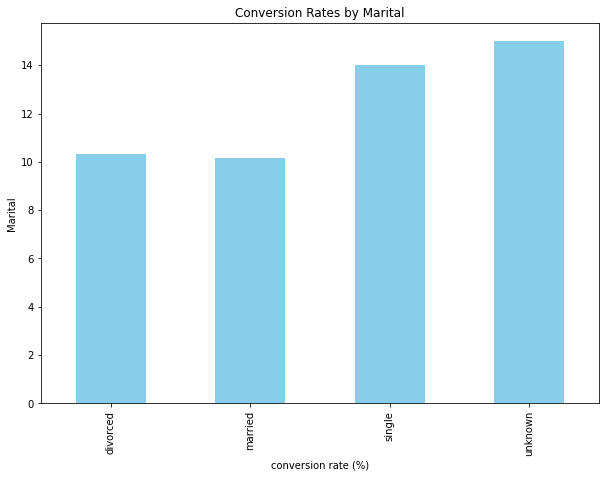

In [27]:
ax = conversion_rate_by_marital.plot(kind='bar',color='skyblue',figsize=(10, 7),title='Conversion Rates by Marital')
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Marital')
plt.show()

### Số lượng khách hàng tham gia chiến dịch với tình trạng hôn nhân là Đã kết hôn lớn nhất nhưng tỉ lệ chuyển đổi lại thấp nhất và nhóm khách hàng Độc thân có tỉ lệ chuyển đổi cao. 

### Education

In [28]:
bank_client['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

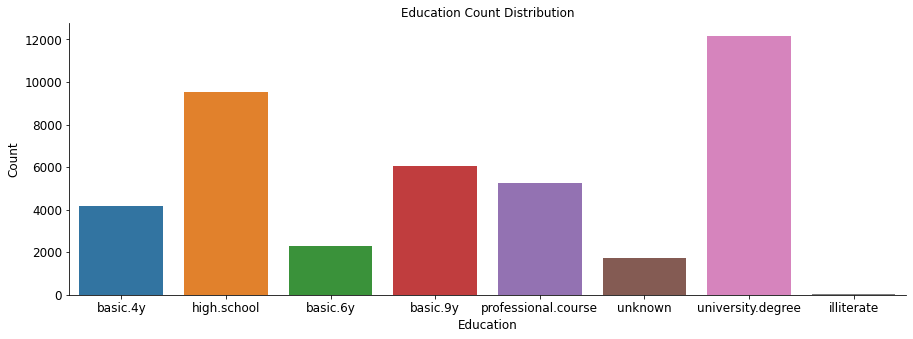

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel('Education', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Education Count Distribution', fontsize=12)
ax.tick_params(labelsize=12)
sns.despine()

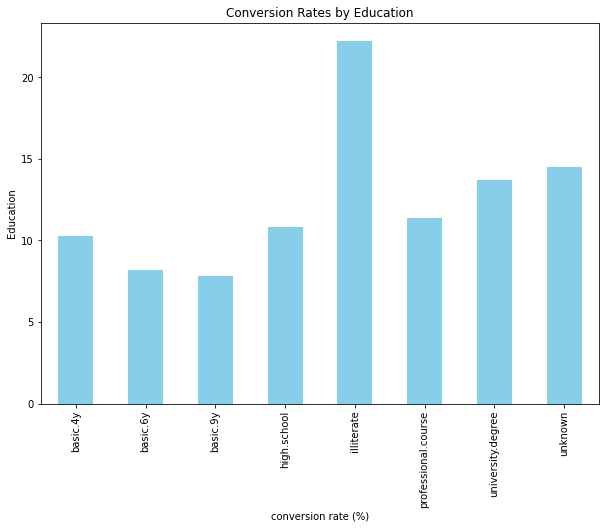

In [30]:
conversion_rate_by_education = bank.groupby(by='education')['conversion'].sum()/bank.groupby(by='education')['conversion'].count() * 100.0
ax = conversion_rate_by_education.plot(kind='bar',color='skyblue',figsize=(10, 7),title='Conversion Rates by Education')
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Education')
plt.show()

### Khách hàng nằm trong nhóm có bằng đại học có số lượng tham gia chiến dịch nhiều nhất và cũng là nhóm khách hàng có tỉ lệ chuyển đổi cao nhất. Nhóm khách hàng là Illiterate cũng có tỉ lệ chuyển đổi cao nhưng số lượng khách hàng tham gia quá ít. Ta cũng có thể thấy nhóm khách hàng có bằng đại học có tỉ lệ chuyển đổi cao 
-> Trình độ học vấn có ảnh hưởng đến tỉ lệ chuyển đổi
-> Nên tập trung giới thiệu sản phẩm gửi tiết kiệm đến nhóm khách hàng có bằng đại học

###Default, Housing, Loan

In [31]:
bank_client['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

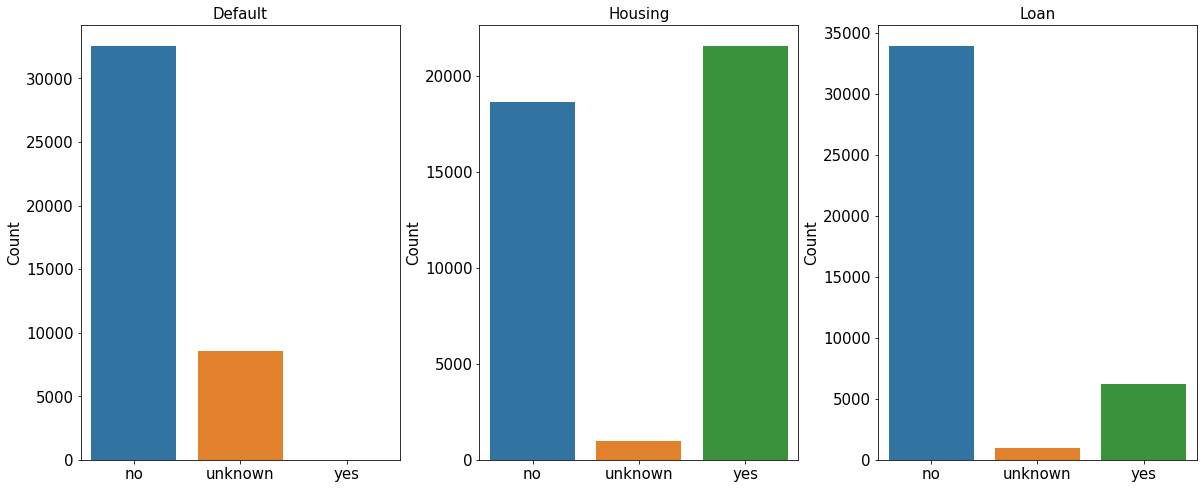

In [32]:
# Khách hàng có khoản nợ tín dụng không trả đươc?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Khách hàng có khoản vay mua nhà?
sns.countplot(x = 'housing', data = bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Khách hàng có khoản vay cá nhân?
sns.countplot(x = 'loan', data = bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

###Phần lớn khách hàng tham gia chiến dịch đều không có các khoản vay tín dụng, khoản vay mua nhà và khoản vay cá nhân

In [33]:
def get_visualization(feature, target):
    a= pd.pivot_table(bank, values=target, index=feature, columns='conversion', aggfunc=len)
    ax=(a.div(a.sum(0), axis=1)).plot(kind='bar', figsize=(10,7), width=0.5, cmap = 'crest', edgecolor=None)
    plt.legend(labels=a.columns, fontsize=12)
    plt.xticks(fontsize=12)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.yticks([])
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x,y = p.get_xy()
        ax.annotate('{:.1%}'.format(height), (x, y+height +0.01))

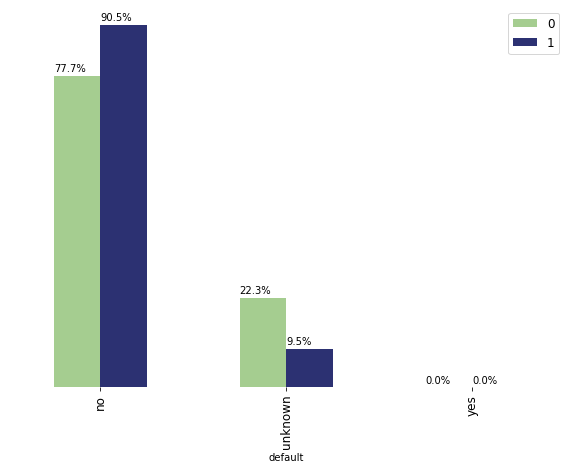

In [34]:

get_visualization('default','y')

###Tỉ lệ chuyển đổi ở nhóm khách hàng không trong tình trạng vỡ nợ cao hơn

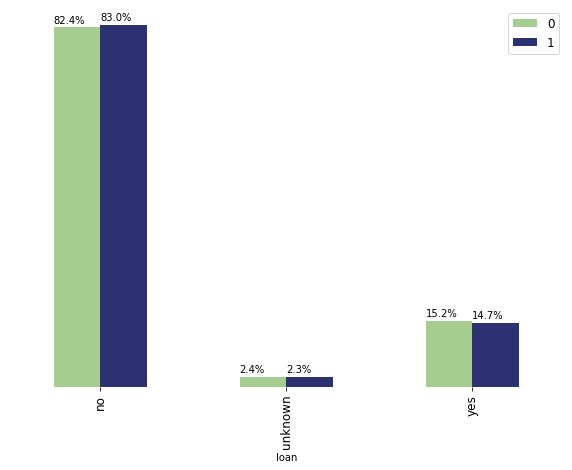

In [35]:
get_visualization('loan','y')

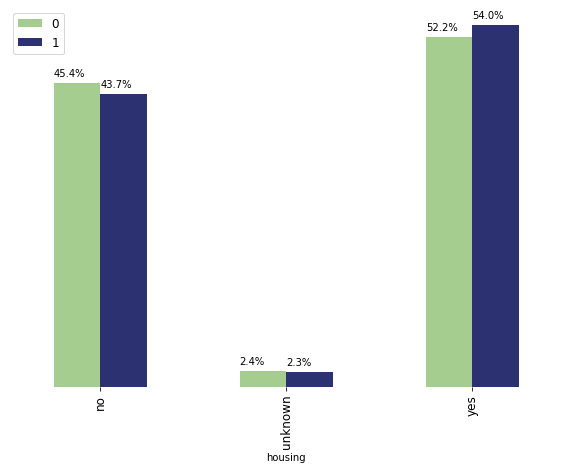

In [36]:
get_visualization('housing','y')

### Tỷ lệ chuyển đổi giữa nhóm khách hàng có khoản vay mua nhà và nhóm không có khoản vay mua nhà không có sự chênh lệch nhiều

Month

In [37]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

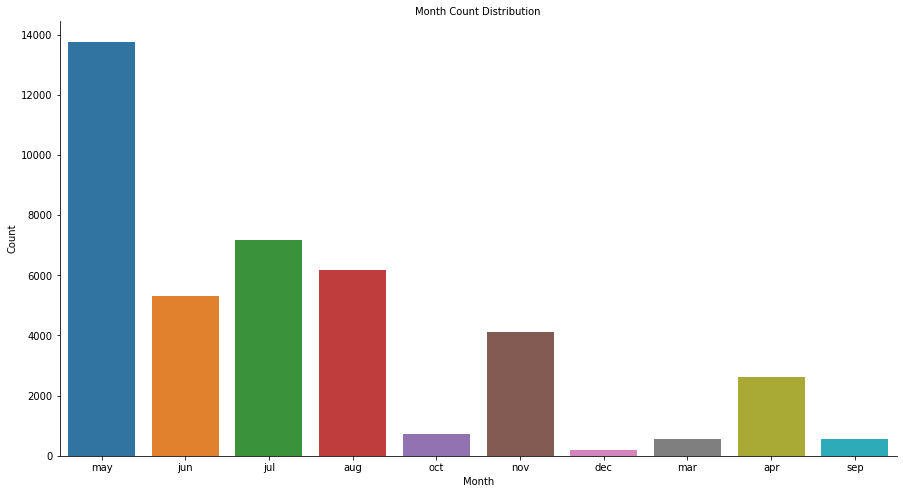

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'month', data = bank)
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Month Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()


### Các tháng 5, 6, 7, 8 có số lượng contact nhiều nhất. Đặc biệt là tháng 5, số lượng khách hàng liên hệ lần cuối cùng trong năm cao gần gấp đôi tháng cao thứ 2(tháng 7)
=> Chiến dịch tập trung vào mùa hè

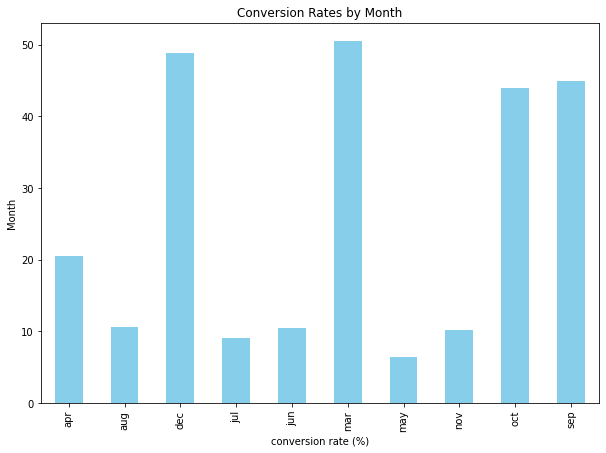

In [39]:
conversion_rate_by_month = bank.groupby(by='month')['conversion'].sum() / bank.groupby(by='month')['conversion'].count() * 100.0
ax = conversion_rate_by_month.plot(kind='bar',color='skyblue',figsize=(10, 7),title='Conversion Rates by Month')
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Month')
plt.show()

### Các tháng 3,9,12 có tỉ lệ chuyển đổi cao. Mặc dù số lượng các cuộc gọi ở các tháng này là khá thấp. 
-> Nên tập trung contact vào các tháng cuối quý để thu hút được nhiều khách hàng hơn

###Day of week 

In [40]:
day_contact = bank.day_of_week.value_counts()/(bank.shape[0])
print(day_contact)

thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: day_of_week, dtype: float64


###Chiến dịch diễn ra vào các ngày trong tuần là các ngày làm việc của ngân hàng. Nhìn chung, các ngày đều có số lượng contact đều nhau

In [41]:
conversion_rate_by_day = bank.groupby(by='day_of_week')['conversion'].sum() / bank.groupby(by='day_of_week')['conversion'].count() * 100.0
conversion_rate_by_day

day_of_week
fri    10.810120
mon     9.950658
thu    12.114180
tue    11.785803
wed    11.667076
Name: conversion, dtype: float64

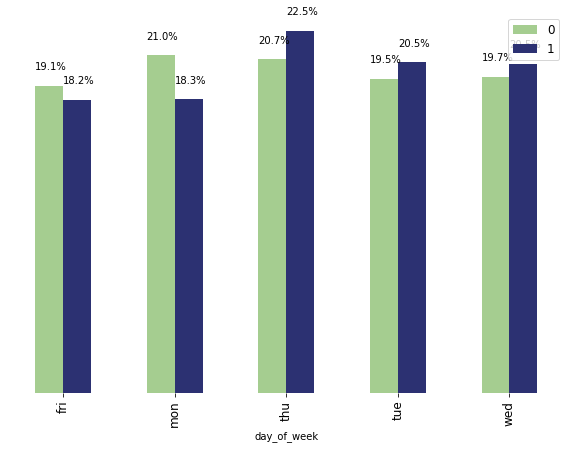

In [42]:
get_visualization('day_of_week','y')

### Từ biểu đồ ta có thể thấy các ngày giữa tuần có tỉ lệ chuyển đổi cao hơn 2 ngày đầu tuần và cuối tuần 
###-> Action: Nên tập trung contact vào các ngày giữa tuần để có nhiều khách hàng hơn

###Type of contact

In [43]:
bank['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

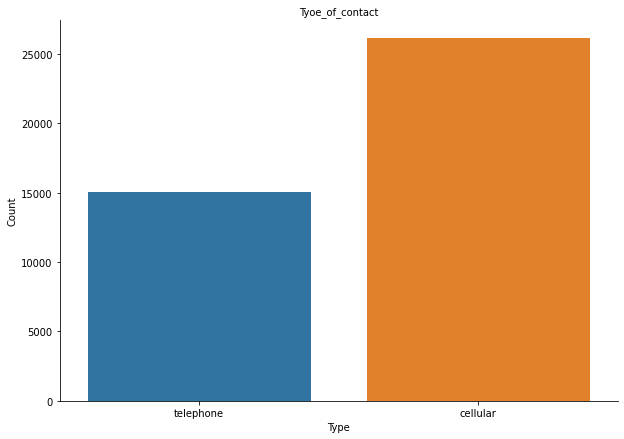

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.countplot(x = 'contact', data = bank)
ax.set_xlabel('Type', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Tyoe_of_contact', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

#Số lượng khách hàng sử dụng điện thoại di động cao hơn rất nhiều so với khách hàng sử dụng điện thoại bàn

In [45]:
conversion_rate_contact = bank.groupby(by='contact')['conversion'].sum() / bank.groupby(by='contact')['conversion'].count() * 100.0
conversion_rate_contact

contact
cellular     14.738856
telephone     5.232365
Name: conversion, dtype: float64

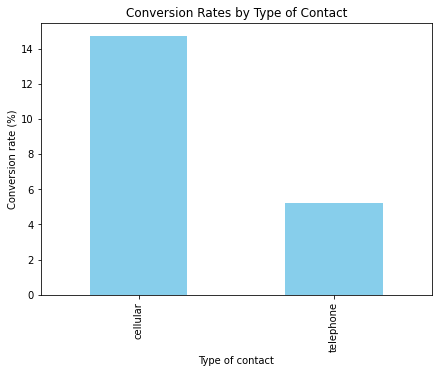

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
conversion_rate_contact.plot(kind='bar',color='skyblue',figsize=[7,5])
ax.set_title('Conversion Rates by Type of Contact')
ax.set_xlabel('Type of contact')
ax.set_ylabel('Conversion rate (%)')
plt.show()

### Tỉ lệ chuyển đổi ở nhóm khách hàng liên hệ bằng điện thoại di động cao gần gấp 3 lần so với điện thoại bàn
-> Nên tăng cường liên lạc với nhóm khách hàng sử dụng điện thoại di động 

###Duration 

In [47]:
avg_duration = bank['duration'].mean()
avg_duration

258.3158150378861

### Thời gian liên lạc trung bình với 1 khách hàng khoảng 4.3 phút

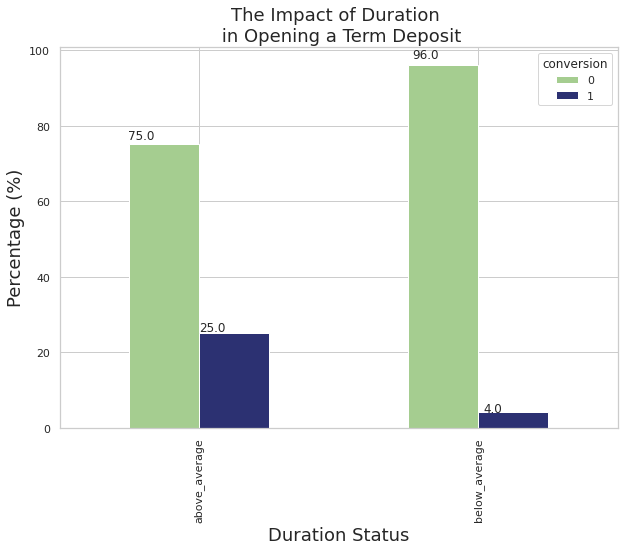

In [48]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
avg_duration
lst = [bank]
bank["duration_status"] = np.nan
for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
pct_term = pd.crosstab(bank['duration_status'], bank['conversion']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap = 'crest')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
plt.show()

###-	Khách hàng có thời lượng liên lạc lâu hơn thời gian trung bình có tỉ lệ chuyển đổi cao hơn so với các khách hàng có thời gian liên lạc thấp hơn thời gian trung bình
#### Thời gian liên lạc với khách hàng càng lâu thì tỉ lệ chuyển đổi càng cao 
#### Action: Ngân hàng nên kéo dài thời gian liên lạc với khách hàng bằng cách tăng tương tác với họ thông qua các câu hỏi hay. Có thể xây dựng các bảng hỏi cho các chiến dịch sau đó


###Conversion rates by number of contact

In [49]:
conversions_by_num_contacts = bank.groupby(by='campaign')['conversion'].sum()/bank.groupby(by='campaign')['conversion'].count() * 100.0
conversions_by_num_contacts

campaign
1     13.037314
2     11.459122
3     10.749064
4      9.396226
5      7.504690
6      7.660878
7      6.041335
8      4.250000
9      6.007067
10     5.333333
11     6.779661
12     2.400000
13     4.347826
14     1.449275
15     3.921569
16     0.000000
17     6.896552
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     6.250000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     0.000000
37     0.000000
39     0.000000
40     0.000000
41     0.000000
42     0.000000
43     0.000000
56     0.000000
Name: conversion, dtype: float64

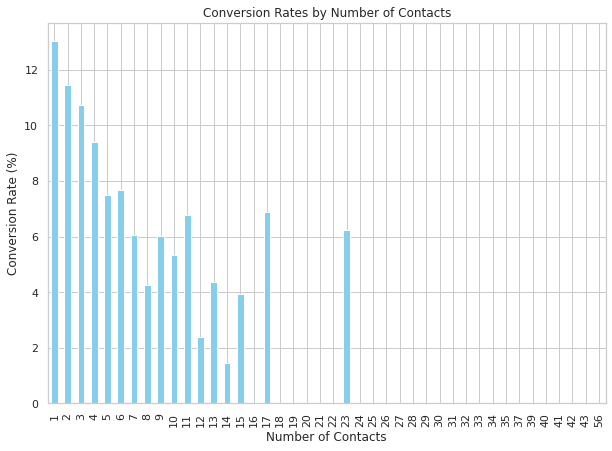

In [50]:
ax = conversions_by_num_contacts.plot(kind='bar',figsize=(10, 7),title='Conversion Rates by Number of Contacts',grid=True,color='skyblue')
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

###-	Tỉ lệ chuyển đổi cao nhất ở nhóm khách hàng với 1 lần liên lạc và có xu hướng giảm dần khi khách hàng được liên lạc thưởng xuyên trong chiến dịch đó. Điều này có thể do việc ngân hàng gọi nhiều lần sẽ khiến họ cảm thấy bị làm phiền và không còn hứng thú với các dịch vụ mà ngân hàng giới thiệu trong cuộc gọi. 
###Action: Hạn chế việc liên lạc thường xuyên với khách hàng. Có thể áp dụng chính sách không gọi quá 4 cuộc gọi với 1 khách hàng.


###Poutcome

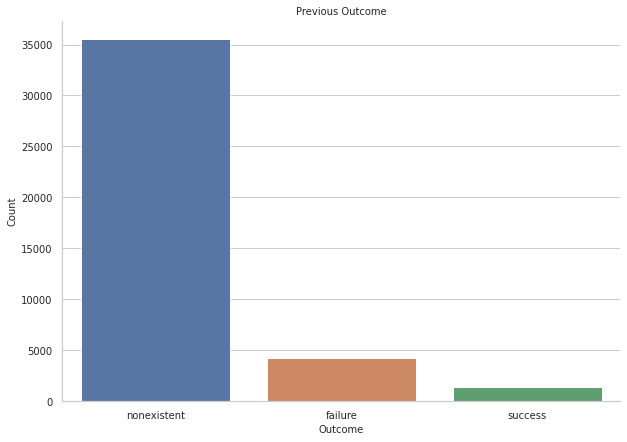

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.countplot(x = 'poutcome', data = bank)
ax.set_xlabel('Outcome', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Previous Outcome', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

# Khách hàng tham gia chiến dịch lần này chủ yếu là khách hàng mới chỉ có một số ít là khách hàng của các chiến dịch trước

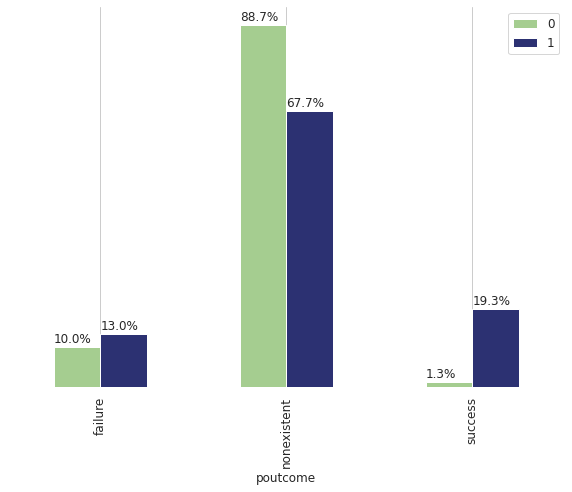

In [53]:
get_visualization("poutcome", 'y')

###Từ biểu đồ ta thấy, với nhóm khách hàng tham gia từ chiến dịch trước có tỉ lệ đăng ký cao ở chiến dịch lần này, đặc biệt là nhóm khách hàng đồng ý trong chiến dịch trước.
###=> Action: Tăng cường tiếp thị đến nhóm khách hàng đã tham gia ở các chiến dịch trước